## Fusion of both the models into one for a multimodal system.
#### (Takes about 5-6 hours to run)

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from glob import glob
from keras import layers
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

imgs=[]
x=[]
y=[]
for filefilepath in glob.iglob('/multimodal/*'):

    if filefilepath[-1] == 'g':

        img = cv2.imread(filefilepath)
        imgs_colored=cv2.imread(filefilepath)
        split = filefilepath.split(".")
        label=split[0][12:]
        example_number = split[1]
        imgs.append([imgs_colored,int(label)])

import random
random.shuffle(imgs)

for i,j in imgs:
        x.append(i)
        y.append(j)

y = keras.utils.np_utils.to_categorical(y)
x = np.asarray(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_set_percent,random_state=42, shuffle=True)

X_train = (X_train / 255.).astype(np.float16)
X_test = (X_test / 255.).astype(np.float16)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

with open('/content/model_history_densenet121.pkl', 'rb') as handle:
        history_fingervein = pickle.load(handle)

with open('/content/model_history_densenet201.pkl', 'rb') as handle:
        history_iris = pickle.load(handle)


middle_layer = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

middle_layer = concatenate([history_fingervein.output,history_iris.output],name="middle_layer")

output_layer = Dense(16, activation = "sigmoid", name = "output_layer")(middle_layer)

merged_model = Model(inputs=[(history_fingervein, history_iris)],outputs=[output_layer], name = "merged model")
        
merged_model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history = merged_model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_val, y_val))

Epoch 1/34
 26/345 [=>............................] - ETA: 1s - loss: 0.1538 - accuracy: 0.8462   

2022-12-13 10:35:57.691882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


340/345 [============================>.] - ETA: 0s - loss: 0.2498 - accuracy: 0.6912

2022-12-13 10:35:59.233257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


345/345 [==============================] - 2s 5ms/step - loss: 0.2497 - accuracy: 0.6899 - val_loss: 0.2423 - val_accuracy: 0.6437
Epoch 2/34
345/345 [==============================] - 2s 5ms/step - loss: 0.2348 - accuracy: 0.6957 - val_loss: 0.2367 - val_accuracy: 0.6437
Epoch 3/34
345/345 [==============================] - 2s 4ms/step - loss: 0.2277 - accuracy: 0.6957 - val_loss: 0.2333 - val_accuracy: 0.6437
Epoch 4/34
345/345 [==============================] - 2s 5ms/step - loss: 0.2229 - accuracy: 0.6957 - val_loss: 0.2313 - val_accuracy: 0.6437
Epoch 5/34
345/345 [==============================] - 2s 5ms/step - loss: 0.2197 - accuracy: 0.6957 - val_loss: 0.2302 - val_accuracy: 0.6437
Epoch 6/34
345/345 [==============================] - 2s 4ms/step - loss: 0.2174 - accuracy: 0.6957 - val_loss: 0.2296 - val_accuracy: 0.6437
Epoch 7/34
345/345 [==============================] - 2s 4ms/step - loss: 0.2158 - accuracy: 0.6957 - val_loss: 0.2294 - val_accuracy: 0.6437
Epoch 8/34
345/34

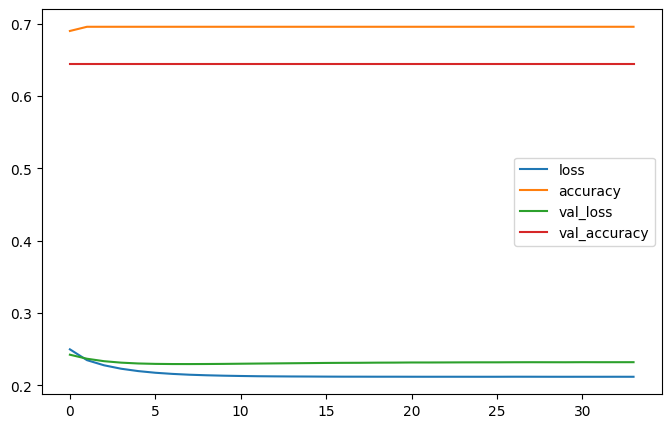

In [10]:
(history.history).plot(figsize=(8,5))
plt.show()

## The combined accuracy of the model is 70% which is good for a multimodal system.
#### For futher improvements we can also consider increasing the weight of the fingervein model while merging both the models into one for futher good accuracy.